In [26]:
#주어진 데이터셋에서 SUB와 OBJ에 따른 조합 결과를 확인하기 위한 코드

#관련된 라이브러리 임포트하기
import pandas as pd
from pandas.plotting import parallel_coordinates

from ast import literal_eval
import matplotlib.pyplot as plt

#훈련 데이터셋을 분석하고자 하니 훈련 데이터셋을 불러오기
train_path = "../data/train_data_type.csv"
train_data = pd.read_csv(train_path) #추후 절대경로로 변경하거나 폴더 안으로 데이터셋을 옮겨놓을 예정

In [27]:
#사용할 함수 선언
def unique_list(column):
    if column in train_data.columns:
        return [i for i in train_data[column].unique()]
    print("여기에 그런 column이 없습니다.")
    
def object2id(list_name, x):
    return list_name.index(x)

In [28]:
subject_list = unique_list("subject_type")
object_list = unique_list("object_type")
label_list = unique_list("label")

In [29]:
train_data["subject_type"] = train_data["subject_type"].apply(lambda x : object2id(subject_list, x))

In [30]:
train_data["object_type"] = train_data["object_type"].apply(lambda x : object2id(object_list, x))

In [31]:
train_data["label"] = train_data["label"].apply(lambda x : object2id(label_list, x)/6)

In [44]:
subject_list

['ORG', 'PER']

In [32]:
train_data

,subject_type,object_type,label
0,0,0,0.000000
1,0,1,0.000000
2,0,1,0.166667
3,0,0,0.333333
4,0,2,0.000000
...,...,...,...
32465,1,3,1.000000
32466,1,0,1.833333
32467,0,0,0.333333
32468,0,1,0.000000


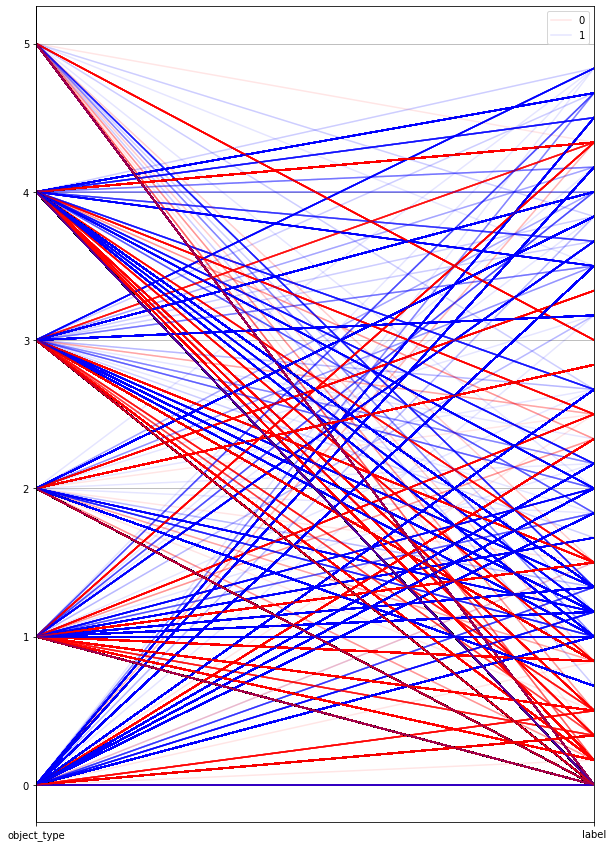

In [43]:
plt.figure(figsize=(10, 15))
parallel_coordinates(train_data, 'subject_type', color=('r', 'b'), alpha=0.1)
plt.show()